<a href="https://colab.research.google.com/github/Saijash84/Zidio/blob/main/E_Commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Customer Segmentation

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

### Reading Data and Knowing the Primaries

In [ ]:
df=pd.read_excel("/content/cust_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df.shape

(30000, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

Gender column have few null values.So we should handle that column


In [ ]:
df['Gender'].isna().sum()

2724

In [ ]:
df.fillna({"Gender":'Nan'},inplace=True)
df.fillna(0,inplace=True)
df.isna().sum().sum()

0

In [ ]:
df['Gender']=df['Gender'].astype('category')

In [ ]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


Creating a new column to find the total value of searches


In [ ]:
df['Total Search']=df.iloc[:,3:].sum(axis=1)
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,Nan,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Finding frequency of orders
df['Search Frequency']=df['Orders']

In [ ]:
#Finding Avg. search
df['Avg Search']=df['Total Search']/df['Search Frequency']
df['Avg Search'].fillna(0,inplace=True)
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,7,0.285714
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,18,0,inf
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,5,7,0.714286
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,inf
4,5,Nan,10,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,16,10,1.600000


In [ ]:
df['Avg Search'].replace(np.inf,0,inplace=True)
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,7,0.285714
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,18,0,0.000000
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,5,7,0.714286
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0.000000
4,5,Nan,10,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,16,10,1.600000


**Visualising Gender vs other features**

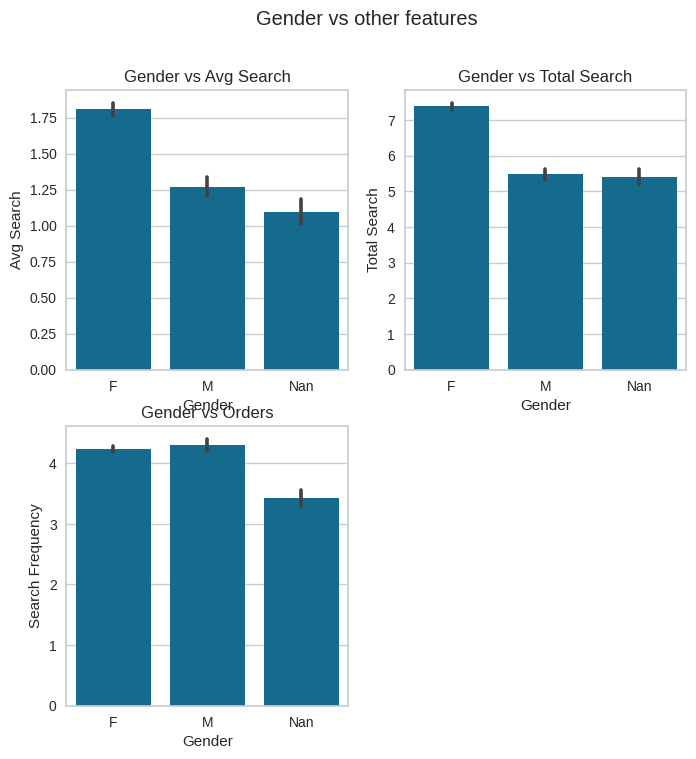

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Gender',y='Avg Search')
plt.title("Gender vs Avg Search")
plt.subplot(2,2,2)
sns.barplot(data=df,x='Gender',y='Total Search')
plt.title("Gender vs Total Search")
plt.subplot(2,2,3)
sns.barplot(data=df,x='Gender',y='Search Frequency')
plt.title("Gender vs Orders")
plt.suptitle("Gender vs other features")
plt.show()

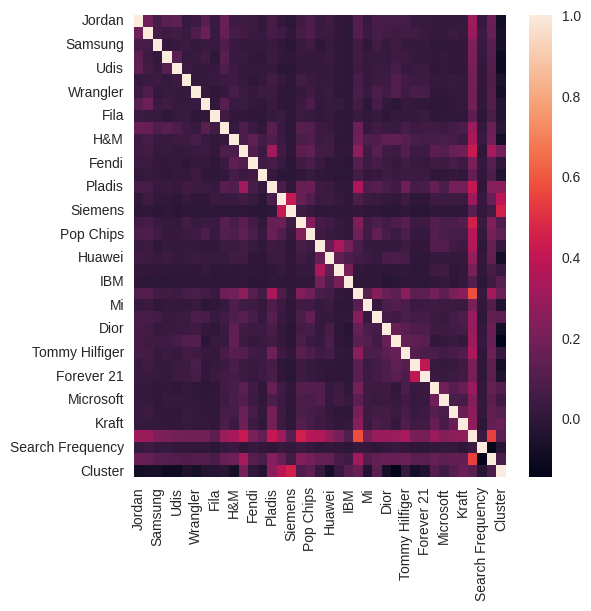

In [ ]:
#Correlation viuals
plt.figure(figsize=(6,6))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

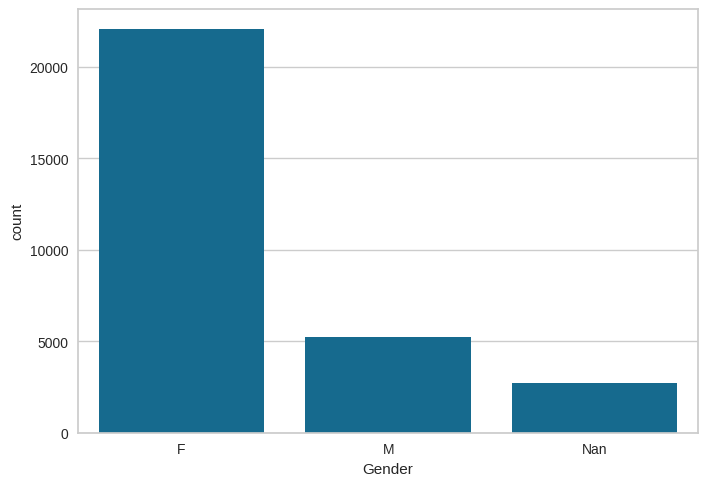

In [ ]:
sns.countplot(x='Gender',data=df)

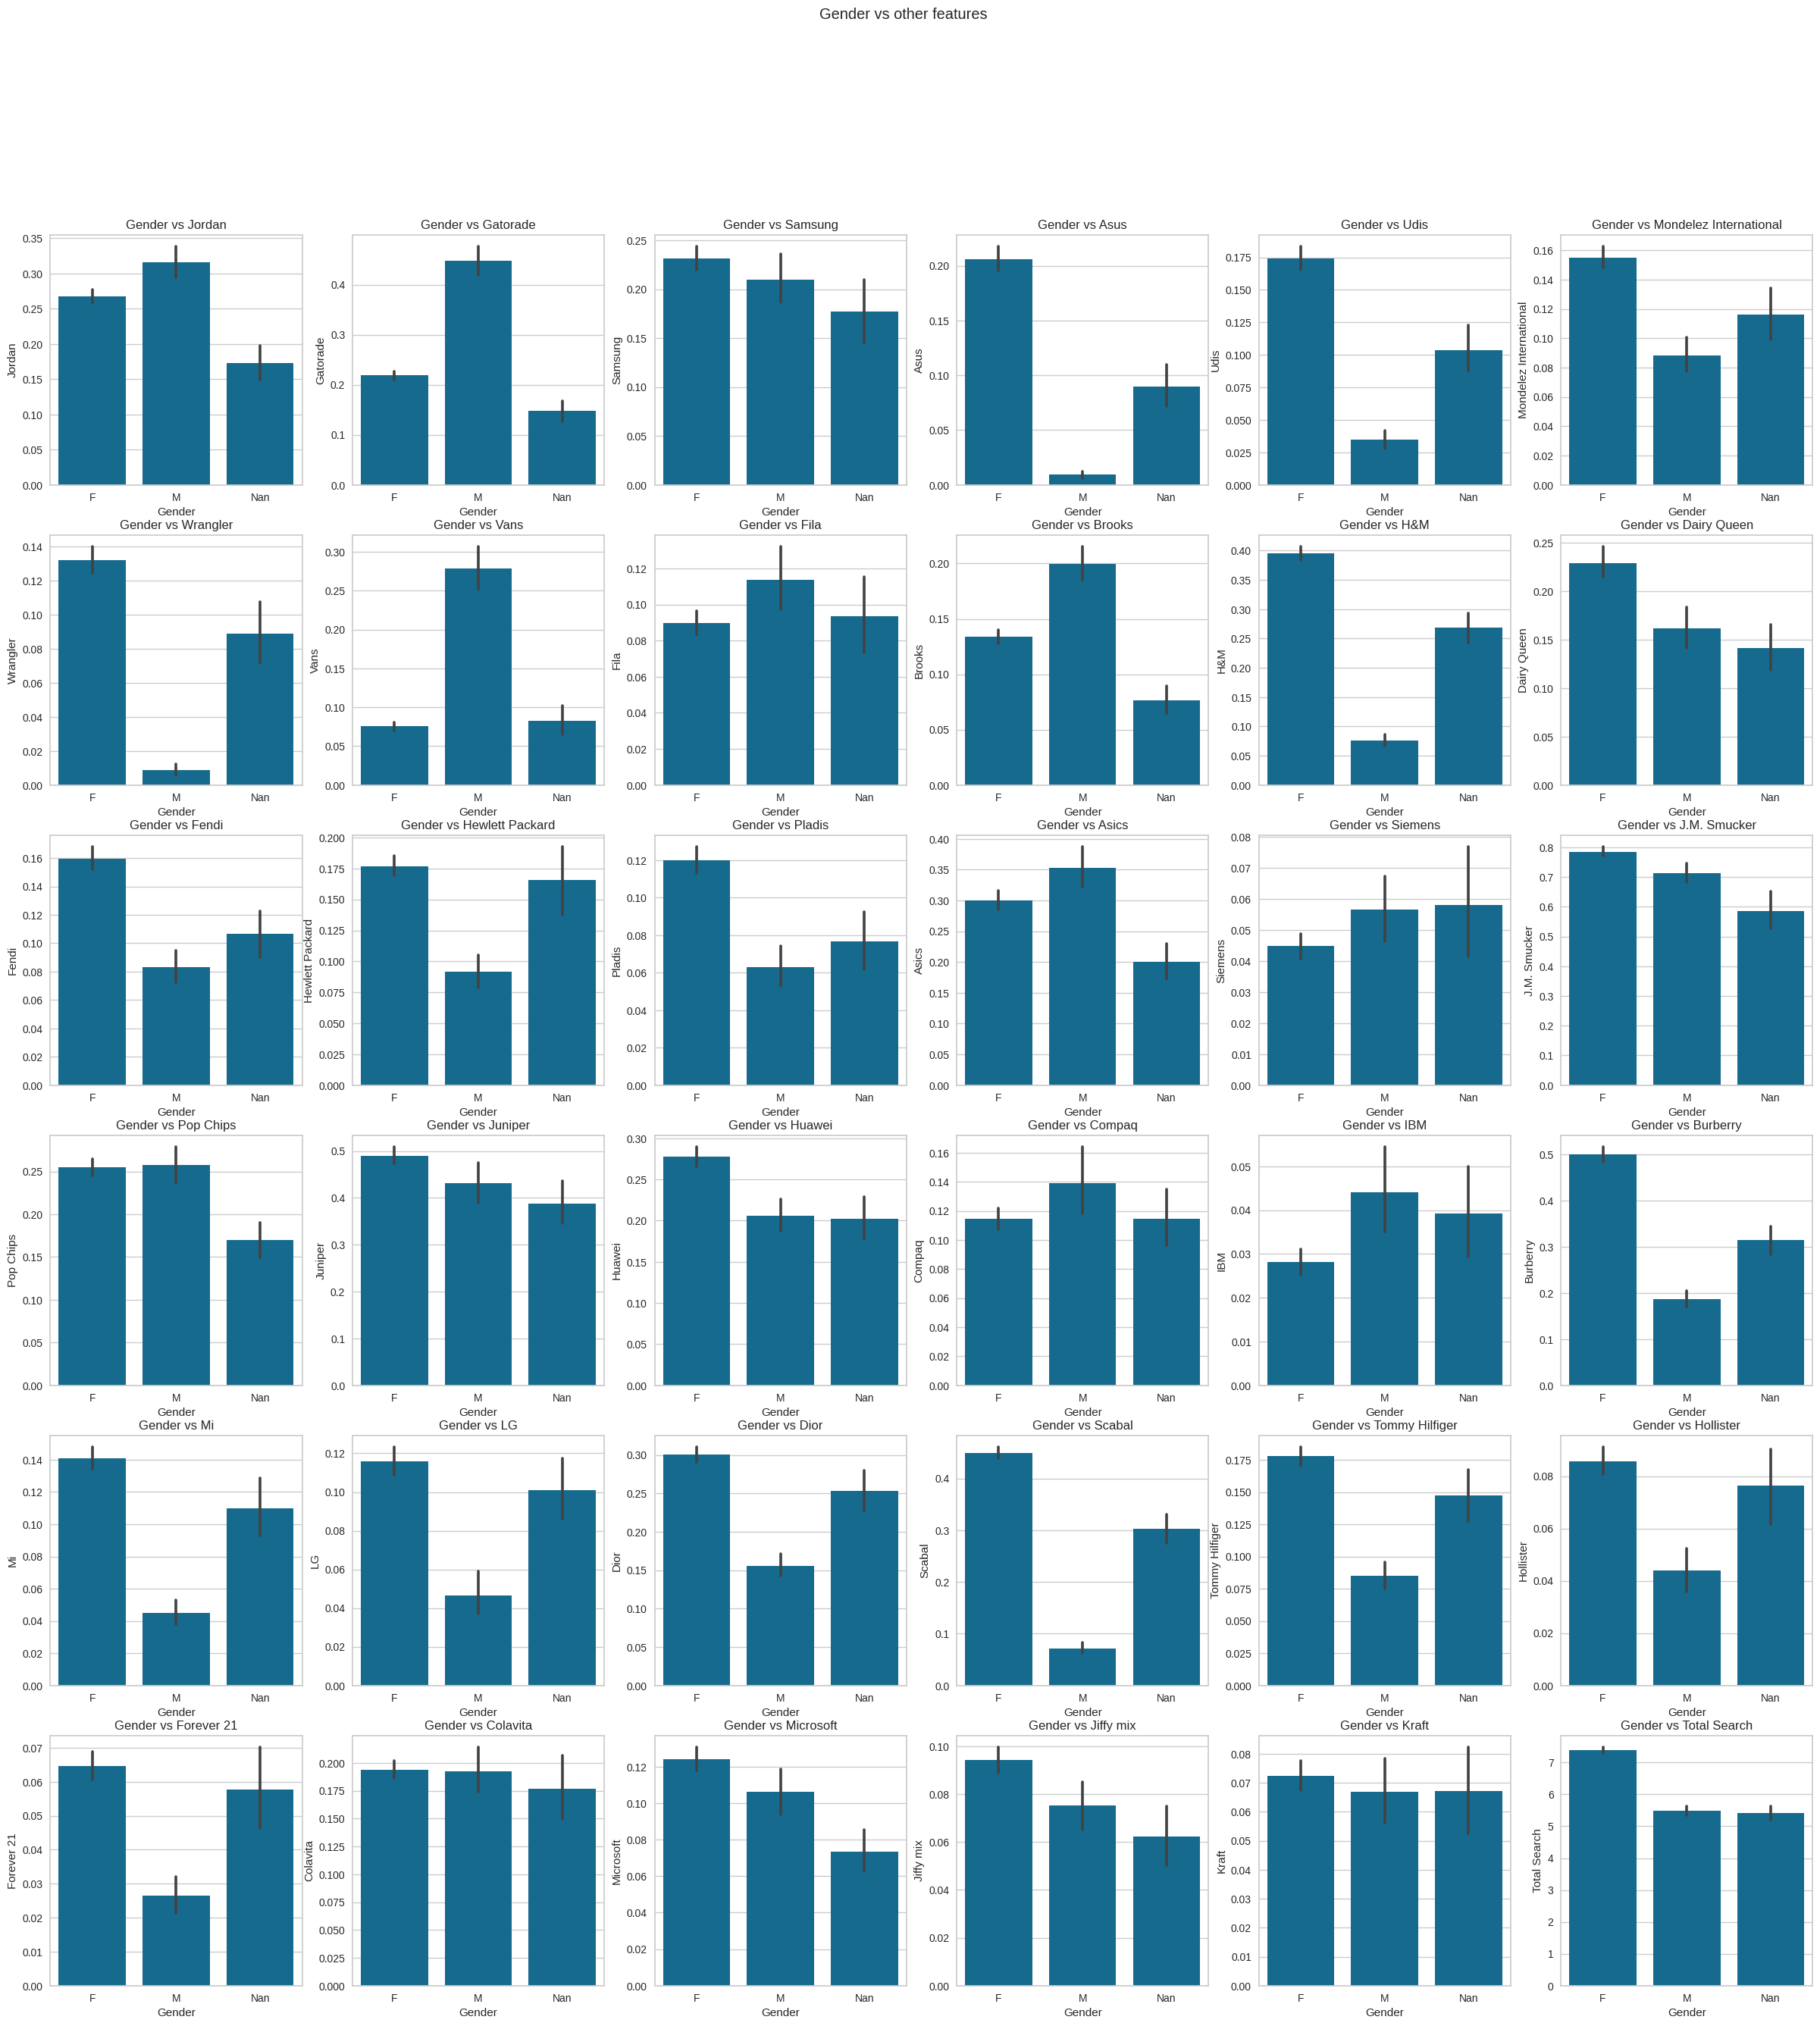

In [ ]:
#Extracting the relation between all other searches
plt.figure(figsize=(30, 30))
for column in range(3,39):
    a=df.columns[column]
    plt.subplot(6,6,column-2)
    sns.barplot(data=df,x='Gender',y=a)
    plt.title("Gender vs "+a)
plt.suptitle("Gender vs other features")
plt.show()

<Axes: xlabel='Total Search', ylabel='Gender'>

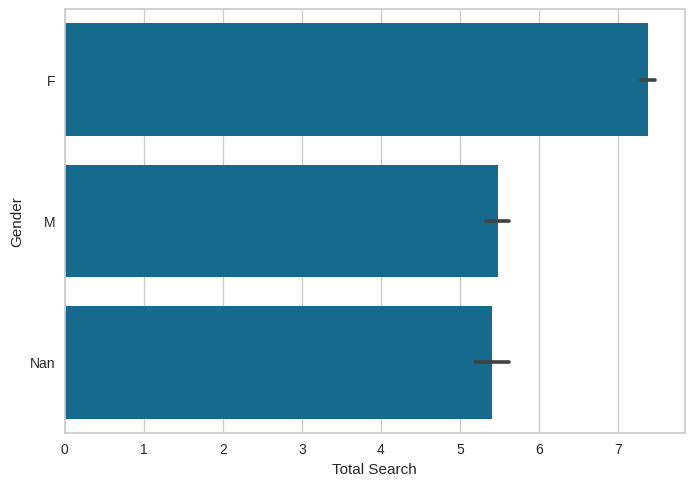

In [ ]:
sns.barplot(x='Total Search',y='Gender',data=df)

In [ ]:
#Using standard scaler to normalise values
x=df.iloc[:,3:].values
scaler=StandardScaler()
features=scaler.fit_transform(x)

In [ ]:
#Applying kmeans clustering
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)

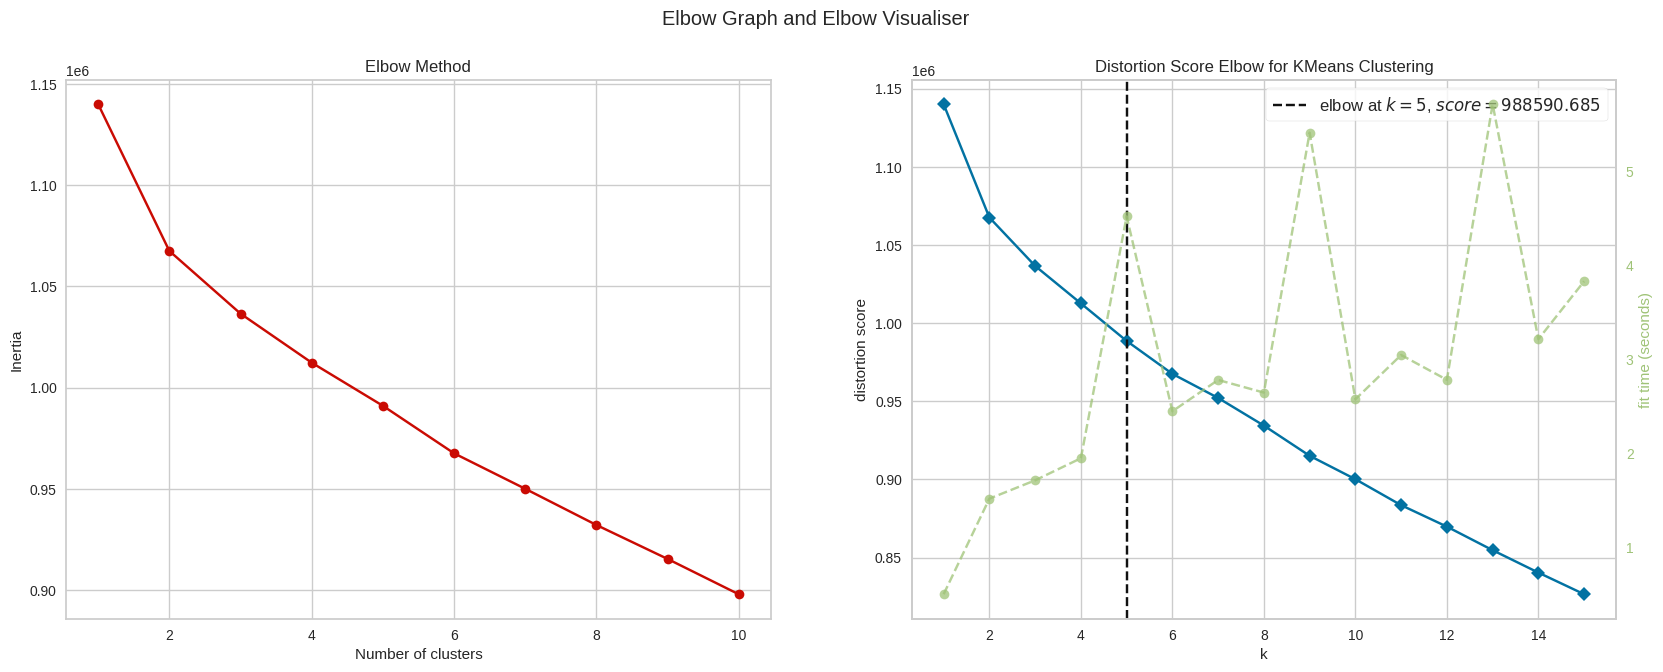

In [ ]:
#Visualising the kmeans clusters
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,11),wcss,'ro-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1,2,2)
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,16))
visualizer.fit(features)
plt.suptitle('Elbow Graph and Elbow Visualiser')
visualizer.poof()
plt.show()

**We have found that k value is 5**

In [ ]:
#Fitting the features to kmeans of 5 clusters
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
clusters=kmeans.fit(features)

In [ ]:
# creating a new column for differentiating the clusters
df['Cluster']=clusters.labels_
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,7,0.285714,1
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,18,0,0.000000,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,1,0,0,5,7,0.714286,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0.000000,1
4,5,Nan,10,0,0,0,0,0,0,0,...,0,0,0,0,1,1,16,10,1.600000,3


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,7,0.285714,1
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,18,0,0.000000,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,1,0,0,5,7,0.714286,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0.000000,1
4,5,Nan,10,0,0,0,0,0,0,0,...,0,0,0,0,1,1,16,10,1.600000,3


**Visualising Cluster Distribution**

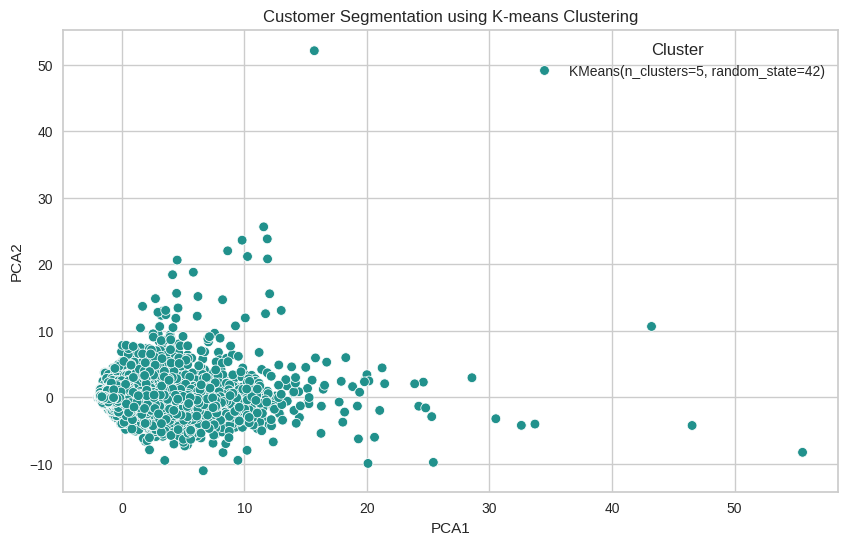

In [ ]:
#Customer segmentation
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

# Create a dataframe for visualization
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis',)
plt.title('Customer Segmentation using K-means Clustering')
plt.show()

**Silhouette Method**



In [ ]:
silhouette_scores=[] # This list will store the silhouette scores for different numbers of clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features,cluster_labels) # Call the silhouette_score function
    silhouette_scores.append(silhouette_avg) # Append the score to the list

Visualising Silhouette plot

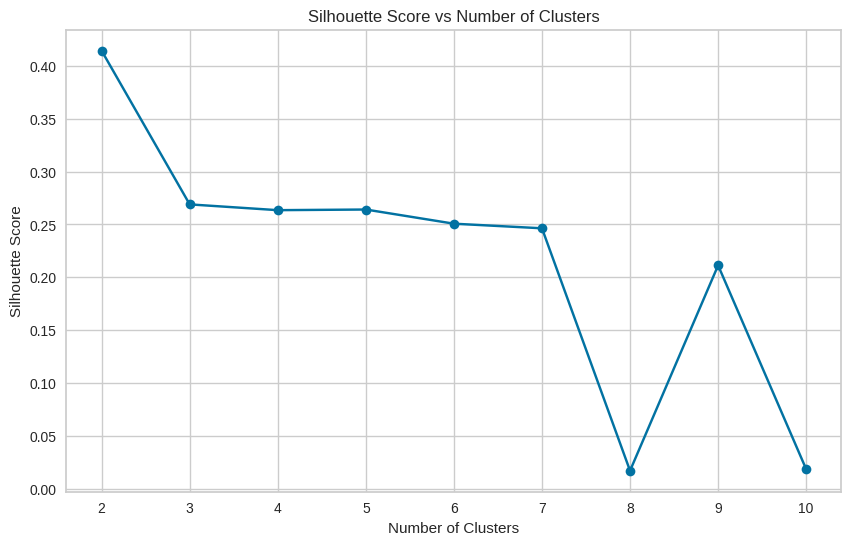

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

**Cluster Analysis**

In [ ]:
model=KMeans(n_clusters=5,init='k-means++',random_state=42)
model=model.fit(features)

In [ ]:
y_km=model.predict(features)
centers=model.cluster_centers_

**Cluster points**

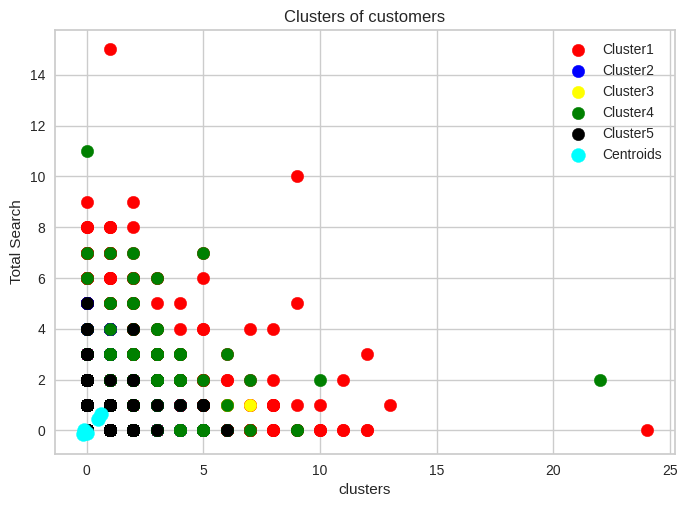

In [ ]:
plt.scatter(x[y_km==0,0],x[y_km==0,1],s=80,c='red',label='Cluster1')
plt.scatter(x[y_km==1,0],x[y_km==1,1],s=80,c='blue',label='Cluster2')
plt.scatter(x[y_km==2,0],x[y_km==2,1],s=80,c='yellow',label='Cluster3')
plt.scatter(x[y_km==3,0],x[y_km==3,1],s=80,c='green',label='Cluster4')
plt.scatter(x[y_km==4,0],x[y_km==4,1],s=80,c='black',label='Cluster5')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('clusters')
plt.ylabel('Total Search')
plt.legend()
plt.show()

In [ ]:
df['Cluster']=pd.DataFrame(y_km)
df.to_csv("Cluster_data",index=False)

In [ ]:
df['Cluster'].value_counts()

Cluster
1    21803
0     6275
3     1011
4      616
2      295
Name: count, dtype: int64

<Axes: xlabel='Cluster', ylabel='count'>

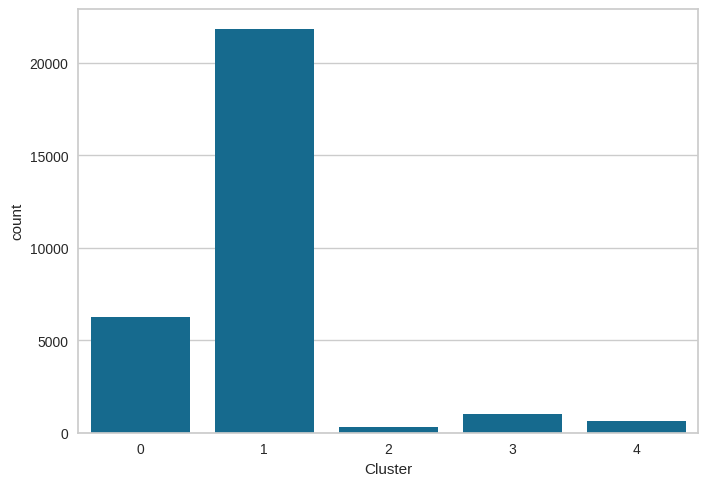

In [ ]:
sns.countplot(data=df,x='Cluster')

In [ ]:
c_df=pd.read_csv('/content/Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,7,0.285714,1
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,18,0,0.000000,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,1,0,0,5,7,0.714286,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0.000000,1
4,5,Nan,10,0,0,0,0,0,0,0,...,0,0,0,0,1,1,16,10,1.600000,3


In [ ]:
c_df['Total Search']=c_df.iloc[:,3:].sum(axis=1)

In [ ]:
cl_0=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search
0,0,F,87816694,23438,3228,2570,2650,2702,2293,1659,...,1811,1221,821,1310,958,646,358,175064.094336,23438,17226.094336
1,0,M,9471672,2839,639,888,356,20,63,129,...,131,116,53,216,123,83,52,19823.626443,2839,1894.626443
2,0,Nan,6717405,1737,222,175,231,137,131,136,...,131,127,72,78,49,44,22,12486.506530,1737,1097.506530


In [ ]:
cl_1=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==1')
cl_1


,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search
3,1,F,226898176,63774,1929,1518,1885,1414,1207,1372,...,1271,393,372,1951,1277,800,554,218677.347294,63774,13591.347294
4,1,M,59057928,18319,852,1313,681,21,111,286,...,244,100,74,593,316,220,170,58174.695635,18319,3498.695635
5,1,Nan,31572346,7156,186,182,223,94,136,151,...,217,68,68,304,124,84,127,25904.386472,7156,1454.386472


In [ ]:
cl_2=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search
6,2,F,2369780,766,52,36,31,31,24,16,...,34,8,5,46,39,11,15,7544.912807,766,660.912807
7,2,M,889325,296,25,11,5,1,1,9,...,5,3,1,23,24,9,13,2793.055952,296,229.055952
8,2,Nan,367217,74,1,2,3,0,4,9,...,3,0,0,9,2,3,2,842.677778,74,18.677778


In [ ]:
cl_3=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==3')
cl_3

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search
9,3,F,14447134,3353,624,587,476,331,263,300,...,728,266,224,892,405,600,648,60883.180014,3353,6987.180014
10,3,M,1408824,420,95,83,45,5,6,14,...,55,9,7,155,77,67,112,6183.939935,420,639.939935
11,3,Nan,977228,205,62,38,22,13,11,15,...,48,13,17,84,21,38,32,3714.393254,205,321.393254


In [ ]:
cl_4=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==4')
cl_4

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search
12,4,F,5983576,1982,71,115,66,69,55,70,...,80,5,3,80,57,21,19,16532.574892,1982,1394.574892
13,4,M,1515608,590,37,47,10,1,0,22,...,9,1,3,19,15,14,3,4686.971898,590,374.971898
14,4,Nan,522087,145,0,5,4,1,1,5,...,2,0,0,6,4,1,0,1428.113348,145,81.113348


Text(0.5, 0.98, 'No. of customers vs Total searches in"Cluster 0"')

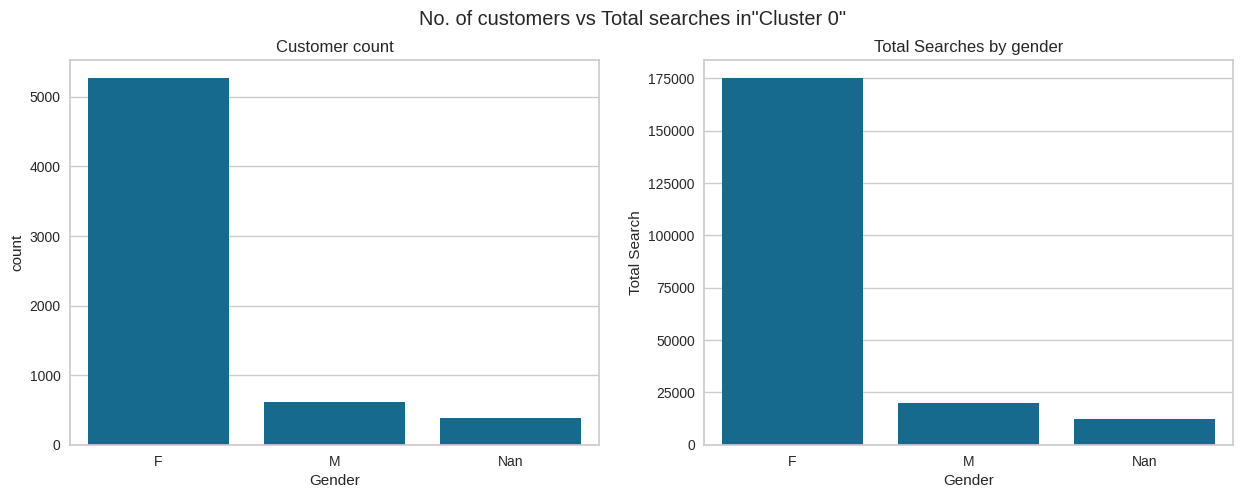

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==0'),x='Gender')
plt.title('Customer count')
#Total Searches by gender
plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y='Total Search')
plt.title('Total Searches by gender')
plt.suptitle('No. of customers vs Total searches in"Cluster 0"')

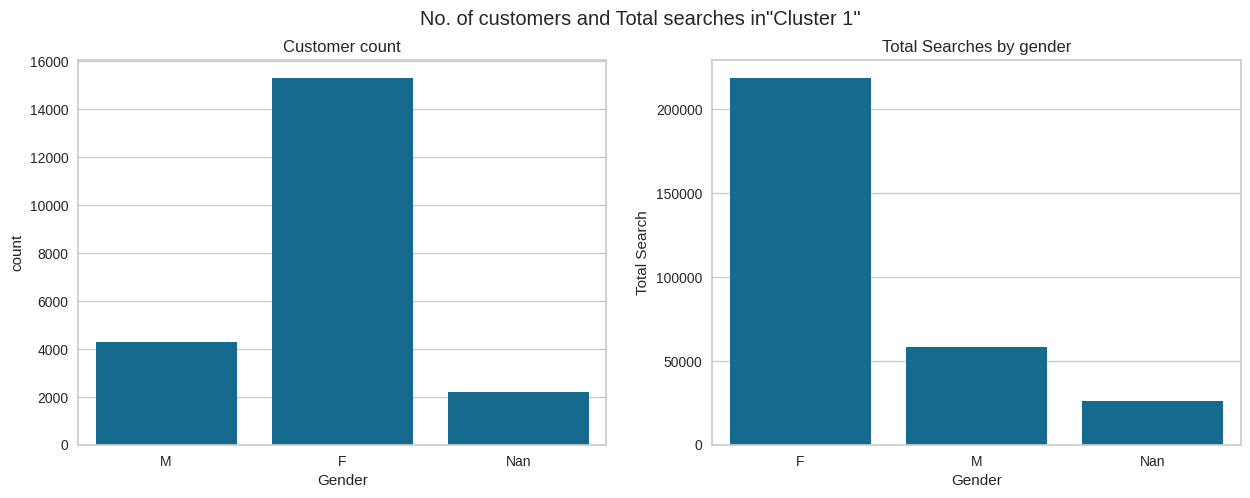

In [ ]:
#cluster1
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==1'),x='Gender')
plt.title('Customer count')

#Total Searches by gender
plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total Searches by gender')
plt.suptitle('No. of customers and Total searches in"Cluster 1"')
plt.show()


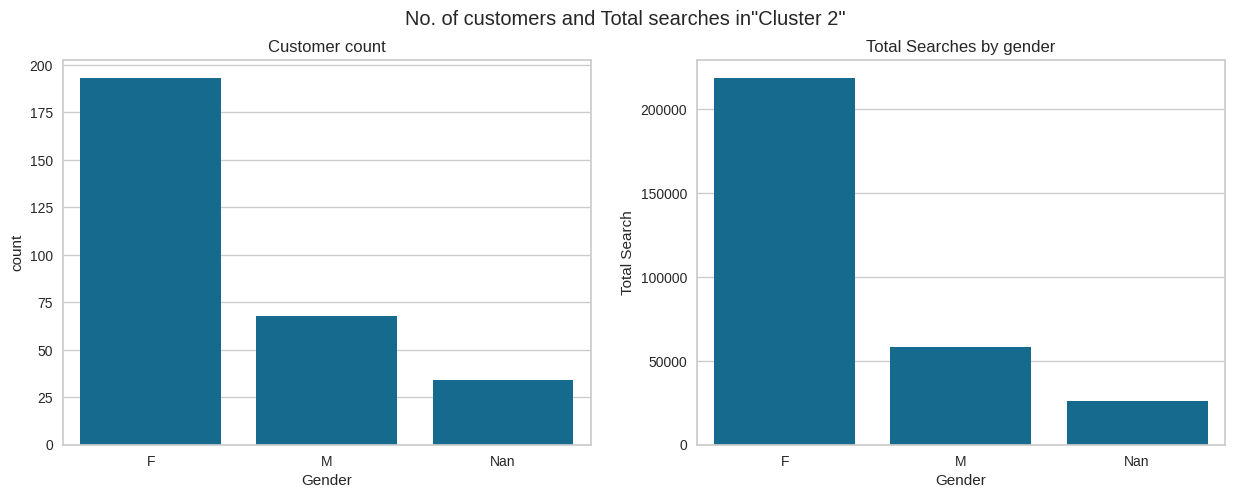

In [ ]:
#cluster2
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==2'),x='Gender')
plt.title('Customer count')

#Total Searches by gender
plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total Searches by gender')
plt.suptitle('No. of customers and Total searches in"Cluster 2"')
plt.show()


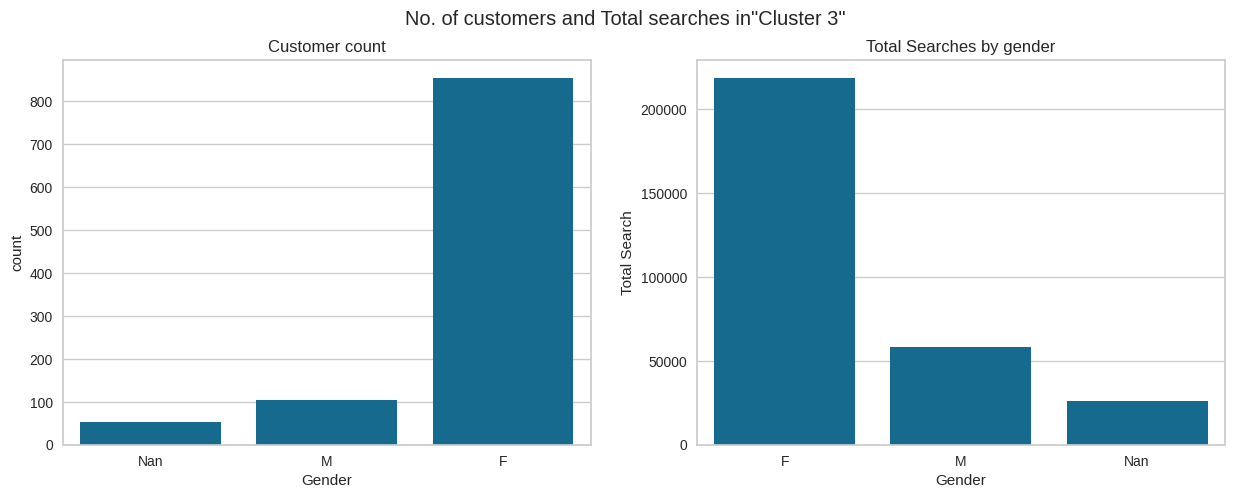

In [ ]:
#cluster3
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==3'),x='Gender')
plt.title('Customer count')

#Total Searches by gender
plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total Searches by gender')
plt.suptitle('No. of customers and Total searches in"Cluster 3"')
plt.show()


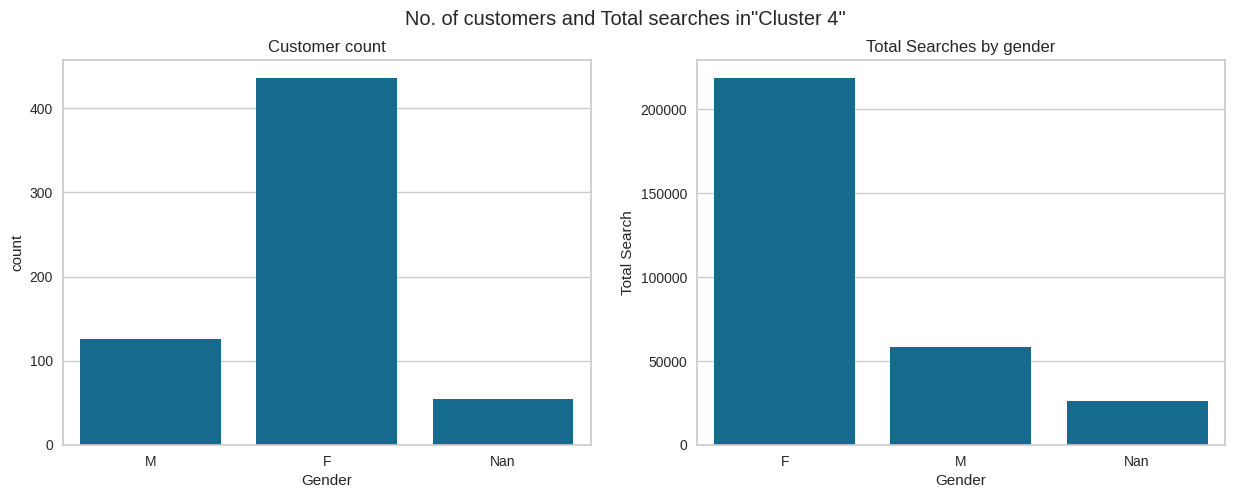

In [ ]:
#cluster4
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==4'),x='Gender')
plt.title('Customer count')

#Total Searches by gender
plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total Searches by gender')
plt.suptitle('No. of customers and Total searches in"Cluster 4"')
plt.show()


In [ ]:
#Creating a dataframe for all 3 clusters
final_df=c_df.groupby(['Cluster'],as_index=False).sum()
final_df


,Cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search,Search Frequency,Avg Search
0,0,104005771,FFFFFFFMFNanFFFFFFMFFFFFFFFNanFFFFFFFFFFFFMMFF...,28014,4089,3633,3237,2859,2487,1924,...,2073,1464,946,1604,1130,773,432,207374.227309,28014,20218.227309
1,1,317528450,MMFFFMFFFFNanFNanNanFFFMFFFMFFFFFMFMFFFNanFMFF...,89249,2967,3013,2789,1529,1454,1809,...,1732,561,514,2848,1717,1104,851,302756.429401,89249,18544.429401
2,2,3626322,FFFFFFFFFFFFFMFFFMFMFNanFNanFFFFFFMFMFFFFFFMFF...,1136,78,49,39,32,29,34,...,42,11,6,78,65,23,30,11180.646537,1136,908.646537
3,3,16833186,NanMFMFFFFNanFFMFFFMFFFFFMFMFFMFFFFFFFMFMFFFFF...,3978,781,708,543,349,280,329,...,831,288,248,1131,503,705,792,70781.513203,3978,7948.513203
4,4,8021271,MFFMFFMFFFFMFMFFFMMNanMFFFMMFFFMFMFFMFFFFFMFFM...,2717,108,167,80,71,56,97,...,91,6,6,105,76,36,22,22647.660137,2717,1850.660137


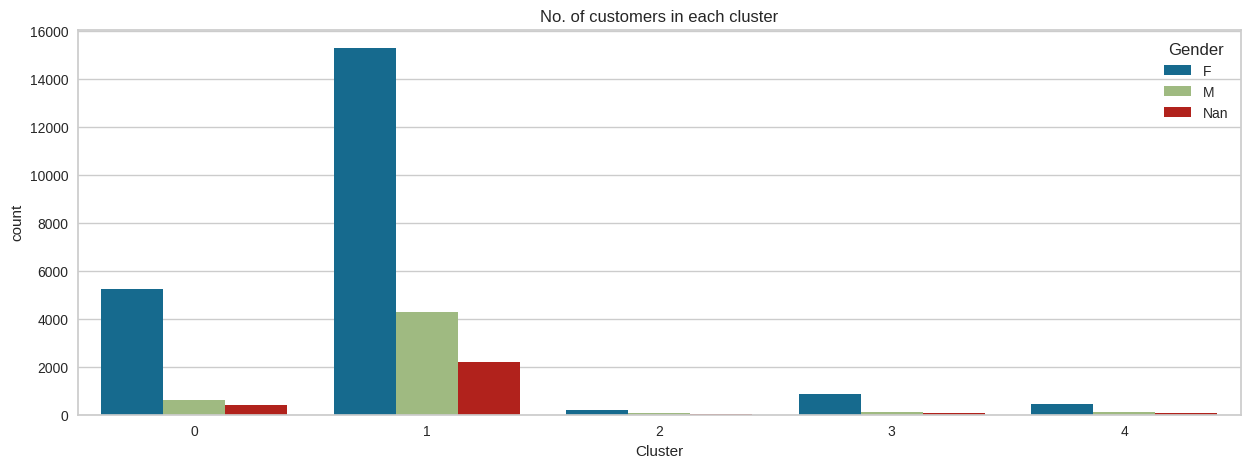

In [ ]:
#No. of customers along with Genders in each cluster
plt.figure(figsize=(15,5))
sns.countplot(data=c_df,x='Cluster',hue='Gender')
plt.title('No. of customers in each cluster')
plt.show()

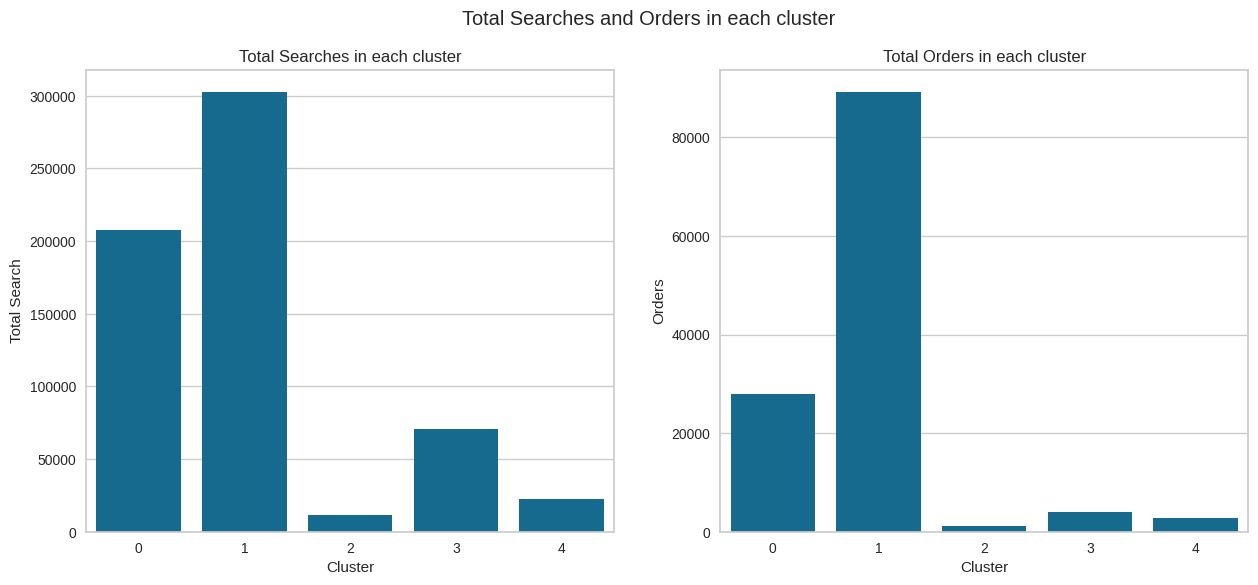

In [ ]:
#No. of searches in each cluster
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total Search')
plt.title('Total Searches in each cluster')
#no. of orders in each cluster
plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Total Orders in each cluster')
plt.suptitle('Total Searches and Orders in each cluster')
plt.show()


**Conclusion:**

The data set contains 5 clusters

1.   Cluster-0

*   Total Searches in 0th cluster is moderate and
*   Orders also moderate


2.  Cluster1

* Most no. of searches   
* Most no. of orders

3.   Cluster2

*   Very less searches
*   very less orders

4.  Cluster 3

*   Moderate searches but
*   Not better orders



5.   Cluster 4

*   Not better searches
*   But less orders


